In [1]:
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.metrics import silhouette_samples, silhouette_score,homogeneity_score,completeness_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn import tree

In [5]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
import numpy as np

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [12]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Exploring the data

In [13]:
data['sex'] = data['sex'].replace({0:'f', 1: 'm'}) # replacing 0s and 1s with 'f' and 'm'

In [14]:
age_death = data[['age','DEATH_EVENT','sex']]

In [15]:
men = data['sex'] == 'm' # filter based on sex

In [16]:
women  = data['sex'] == 'f'

In [17]:
men_who_smoke = (data['sex'] =='m') & (data['smoking'] == 1)

In [18]:
women_who_smoke =(data['sex'] =='f') & (data['smoking'] == 1)

<AxesSubplot:xlabel='age', ylabel='creatinine_phosphokinase'>

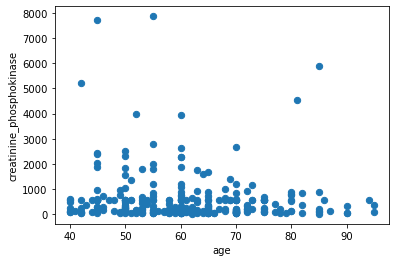

In [19]:
data.plot.scatter(x='age', y ='creatinine_phosphokinase',s=40)

<AxesSubplot:xlabel='age', ylabel='serum_creatinine'>

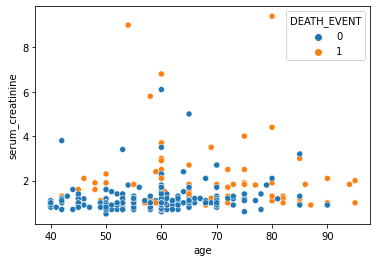

In [20]:
sns.scatterplot(data=data,x='age', y ='serum_creatinine',hue='DEATH_EVENT')
# high creatinine levels are assoicated with heart failure

<AxesSubplot:xlabel='serum_sodium', ylabel='age'>

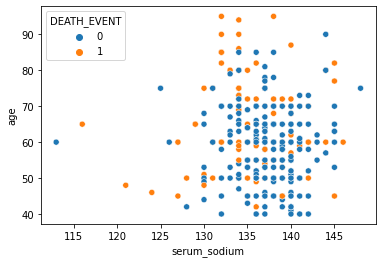

In [21]:
sns.scatterplot(x=data['serum_sodium'],y=data['age'],hue=data['DEATH_EVENT']) 


In [22]:
cpk = data['creatinine_phosphokinase'] > 120
data[cpk]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,m,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,m,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,m,1,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,f,0,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,m,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52.0,0,190,1,38,0,382000.00,1.0,140,m,1,258,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,f,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,f,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,m,1,280,0


In [23]:
val = data[men_who_smoke]['age'].value_counts()

In [24]:
x = np.array(val.index)

In [25]:
y = val.values

<BarContainer object of 31 artists>

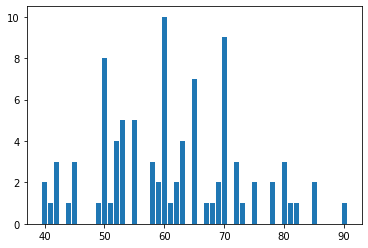

In [26]:
plt.bar(x,y) # men who smoke based on age

Text(0.5, 1.0, 'Ages')

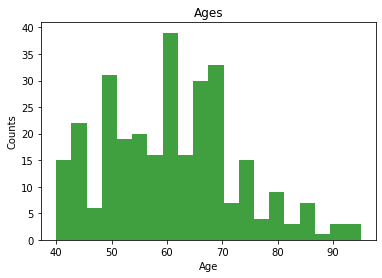

In [27]:
plt.hist(data['age'], 20, facecolor='g', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Ages')

In [28]:
data[men_who_smoke].shape[0]/data[men].shape[0] # precentage of smokers among men

0.4742268041237113

In [29]:
data[women_who_smoke].shape[0]/data[women].shape[0] # percentage of smokers among women

0.0380952380952381

In [30]:
deaths_m = (data['sex'] =='m') & (data['DEATH_EVENT'] == 1)

In [31]:
deaths_w =(data['sex'] =='f') & (data['DEATH_EVENT'] == 1)

In [32]:
data[deaths_m].shape[0]/data[men].shape[0] 

0.31958762886597936

In [33]:
data[deaths_w].shape[0]/data[women].shape[0]

0.3238095238095238

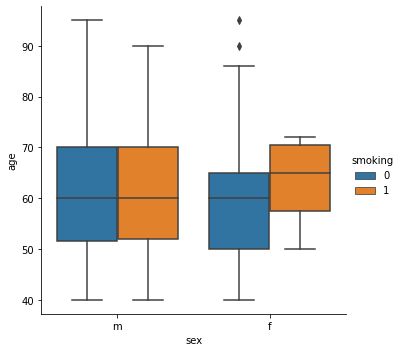

In [34]:
# for smoking
sns.catplot(data=data, x="sex", y="age", hue="smoking", kind="box") 

In [35]:
#for diabetes
no_dia = data['diabetes'] ==0
diab = data['diabetes'] ==1
d_sex = pd.DataFrame({'diabetes':list(data[diab]['sex'].value_counts()),
             'nodiabetes':list(data[no_dia]['sex'].value_counts())},
                     index = ['male', 'female']
            )

# for anamiea
no_ana = data['anaemia'] ==0
a_sex = pd.DataFrame({'anaemia':list(data[diab]['sex'].value_counts()),
             'noanaemia':list(data[no_dia]['sex'].value_counts())},
                     index = ['male', 'female']
                    )

<AxesSubplot:>

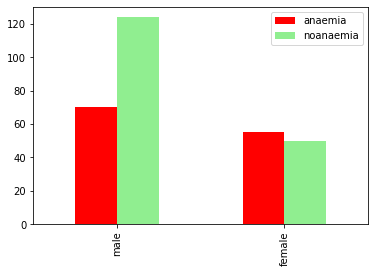

In [36]:
a_sex
a_sex.plot(kind='bar', stacked=False, color=['red','lightgreen'])

In [37]:
a_sex

,anaemia,noanaemia
male,70,124
female,55,50


<AxesSubplot:xlabel='anaemia', ylabel='count'>

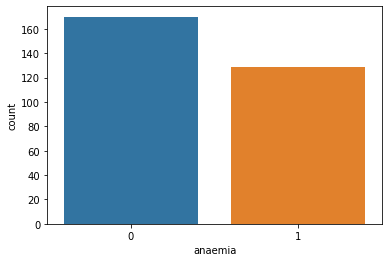

In [38]:
sns.countplot(x = data['anaemia'])

<AxesSubplot:>

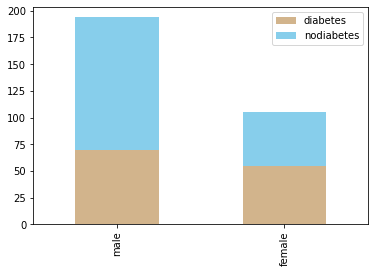

In [39]:
d_sex
d_sex.plot(kind='bar', stacked=True, color=['tan', 'skyblue']) # women tend to be more diabetic

In [40]:
diab_death = pd.DataFrame({'diabetes':list(data[diab]['DEATH_EVENT'].value_counts()),
             'nodiabetes':list(data[no_dia]['DEATH_EVENT'].value_counts())},
                     index = ['alive', 'dead']
            )

In [41]:
ana_death = pd.DataFrame({'anaemia':list(data[diab]['DEATH_EVENT'].value_counts()),
             'noanamemia':list(data[no_dia]['DEATH_EVENT'].value_counts())},
                     index = ['alive', 'dead']
            )

In [42]:
ana_death

,anaemia,noanamemia
alive,85,118
dead,40,56


<AxesSubplot:>

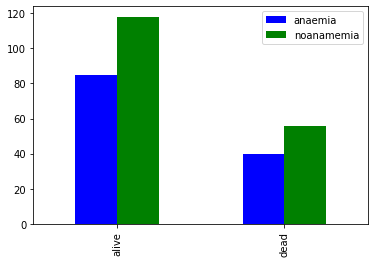

In [43]:
ana_death.plot(kind='bar', color=['blue','green']) 

In [44]:
diab_death

,diabetes,nodiabetes
alive,85,118
dead,40,56


<AxesSubplot:>

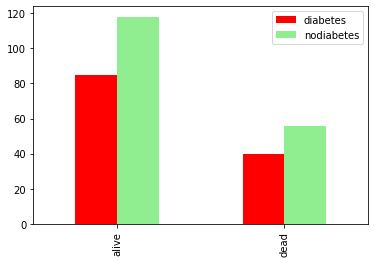

In [45]:
diab_death.plot(kind='bar', color=['red','lightgreen']) # diabetes is more common among those who died

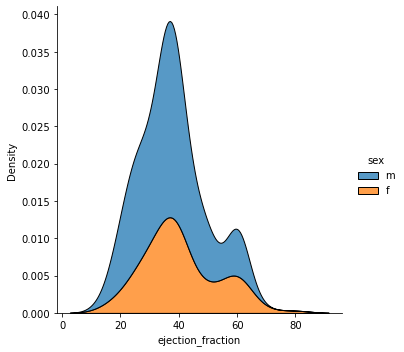

In [46]:
# ejf = data['ejection_fraction'] <= 40
# low_ejf= data[ejf]
sns.displot(data,x='ejection_fraction', hue="sex", kind="kde",multiple="stack", warn_singular=False) 
# Below 40, which is the borderline for too low
# this makes sense since we are dealing with people who live with heart failure.

In [47]:
ejf = data['ejection_fraction'] < 40
ejf_data = data[ejf]
ejf_data['sex'].value_counts()

m    125
f     57
Name: sex, dtype: int64

<AxesSubplot:>

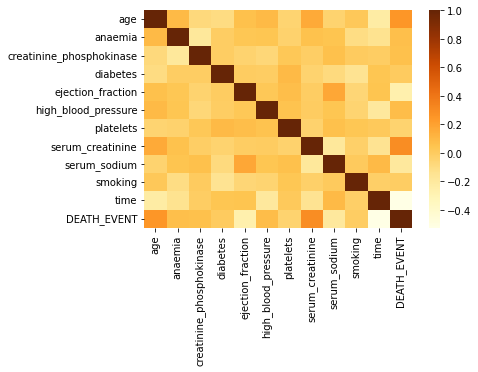

In [48]:
sns.heatmap(data.corr(), cmap = 'YlOrBr')

In [49]:
# smoker dataFrame
smk = data['smoking'] == 1
no_smk = data['smoking'] == 0
smok_sex = pd.DataFrame({'smoker':list(data[smk]['sex'].value_counts()),
             'non-smoker':list(data[no_smk]['sex'].value_counts())},
                     index = ['men', 'women']
            )

In [50]:
# high blood pressure dataFrame
hblp = data['high_blood_pressure'] == 1
no_hblp = data['high_blood_pressure'] == 0
hbpl_sex = pd.DataFrame({'high bp':list(data[hblp]['sex'].value_counts()),
             'no hbp':list(data[no_hblp]['sex'].value_counts())},
                     index = ['men', 'women']
            )

<AxesSubplot:>

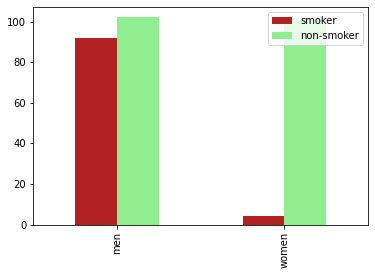

In [51]:
smok_sex.plot(kind='bar', color=['firebrick','lightgreen']) # women smoke less than men. 92 to 4 

<AxesSubplot:>

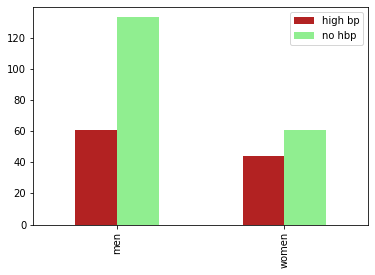

In [52]:
hbpl_sex.plot(kind='bar', color=['firebrick','lightgreen']) # women smoke less than men. 92 to 4 

<AxesSubplot:xlabel='serum_sodium', ylabel='platelets'>

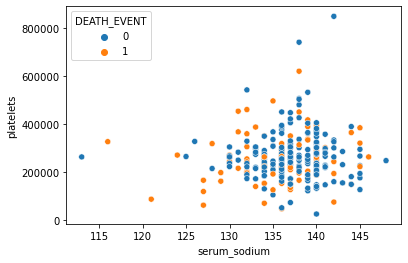

In [53]:
sns.scatterplot(x=data['serum_sodium'],y=data['platelets'], hue =data['DEATH_EVENT']) 
# I chose sodium because it correlates the most with platelets 

<AxesSubplot:xlabel='age', ylabel='serum_creatinine'>

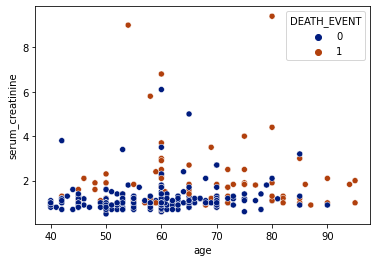

In [54]:
sns.scatterplot(x=data['age'],y=data['serum_creatinine'], hue =data['DEATH_EVENT'],palette="dark") 
# most values are under 2. 

0.3210702341137124

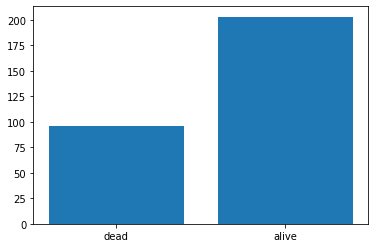

In [55]:
l = ['dead','alive']
dead_pp = data['DEATH_EVENT'] == 1
living_pp = data['DEATH_EVENT'] == 0
vvv = [data[dead_pp].shape[0],data[living_pp].shape[0]]
plt.bar(l,vvv)
data[dead_pp].shape[0]/data.shape[0]

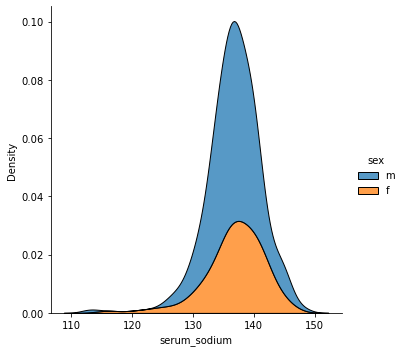

In [56]:

sns.displot(data,x='serum_sodium', hue="sex", kind="kde",multiple="stack", warn_singular=False) 

# most people have normal sodium levels  136-145

In [57]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,m,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,m,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,m,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,m,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,f,0,8,1


## Unsuperived learning

In [58]:
X = data.drop(columns='DEATH_EVENT').values

In [59]:
y = data['DEATH_EVENT'].values

In [60]:
# numeric_cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']
cols = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']

In [61]:
scaler = StandardScaler()

In [62]:
df_num = data[cols]

In [63]:
copy_data = data.copy()

In [64]:
df_num

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,75.0,582,20,265000.00,1.9,130
1,55.0,7861,38,263358.03,1.1,136
2,65.0,146,20,162000.00,1.3,129
3,50.0,111,20,210000.00,1.9,137
4,65.0,160,20,327000.00,2.7,116
...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143
295,55.0,1820,38,270000.00,1.2,139
296,45.0,2060,60,742000.00,0.8,138
297,45.0,2413,38,140000.00,1.4,140


In [65]:
copy_data[df_num.columns] = scaler.fit(df_num)
copy_data[df_num.columns] = scaler.transform(df_num)

In [66]:
copy_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,1.192945,0,0.000166,0,-1.530560,1,1.681648e-02,0.490057,-1.504036,m,0,4,1
1,-0.491279,0,7.514640,0,-0.007077,0,7.535660e-09,-0.284552,-0.141976,m,0,6,1
2,0.350833,0,-0.449939,0,-1.530560,0,-1.038073e+00,-0.090900,-1.731046,m,1,7,1
3,-0.912335,1,-0.486071,0,-1.530560,0,-5.464741e-01,0.490057,0.085034,m,0,7,1
4,0.350833,1,-0.435486,1,-1.530560,0,6.517986e-01,1.264666,-4.682176,f,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,0,-0.537688,1,-0.007077,1,-1.109765e+00,-0.284552,1.447094,m,1,270,0
295,-0.491279,0,1.278215,0,-0.007077,0,6.802472e-02,-0.187726,0.539054,f,0,271,0
296,-1.333392,0,1.525979,1,1.854958,0,4.902082e+00,-0.575031,0.312044,f,0,278,0
297,-1.333392,0,1.890398,0,-0.007077,0,-1.263389e+00,0.005926,0.766064,m,1,280,0


In [67]:
le = LabelEncoder()
le.fit(copy_data['sex'])
le.classes_
arr = le.transform(copy_data['sex'])
copy_data['sex'] = arr.tolist()

In [68]:
# cols.append('sex')

In [69]:
cols

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium']

In [70]:
col_set = copy_data[cols]

In [71]:
data_copy3 = data.copy()
data_copy3[cols] = col_set  

In [72]:
data_copy3['sex'] = data_copy3['sex'].replace({'f':0, 'm': 1})

In [73]:
col_set_final = data_copy3

In [74]:
col_set

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176
...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064


In [75]:
kmeans = KMeans(n_clusters=2)
label = kmeans.fit_predict(col_set)

In [76]:
silhouette = silhouette_score(col_set, label)
homogenity = homogeneity_score(np.array(data['DEATH_EVENT']),label)
completeness = completeness_score(np.array(data['DEATH_EVENT']),label)

In [77]:
print("silhouette: ", silhouette)
print("homogenity: ", homogenity)
print("completeness: ", completeness)

silhouette:  0.1496468647646629
homogenity:  0.08891858550386735
completeness:  0.0807548501259989


In [78]:
label

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtyp

In [79]:
filtered_label0 = data[label == 0]

<AxesSubplot:xlabel='age', ylabel='serum_creatinine'>

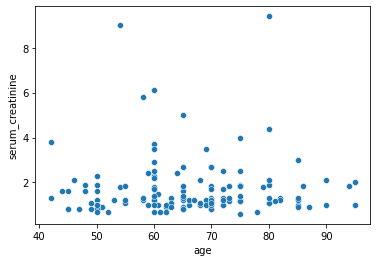

In [80]:
sns.scatterplot(x =filtered_label0['age'],y=filtered_label0['serum_creatinine'])

In [81]:
 filtered_label1 = data[label == 1]

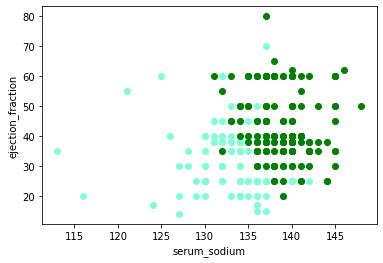

In [82]:
plt.scatter(filtered_label0['serum_sodium'], filtered_label0['ejection_fraction'],color ='aquamarine')
plt.scatter(filtered_label1['serum_sodium'], filtered_label1['ejection_fraction'],color ='green')
plt.xlabel('serum_sodium')
plt.ylabel('ejection_fraction')
plt.show()

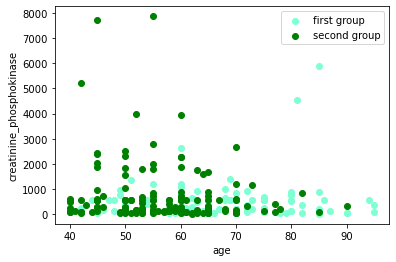

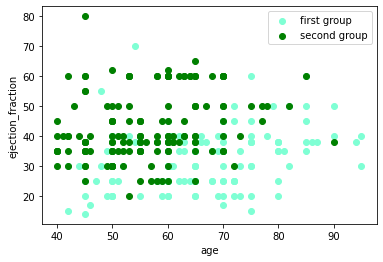

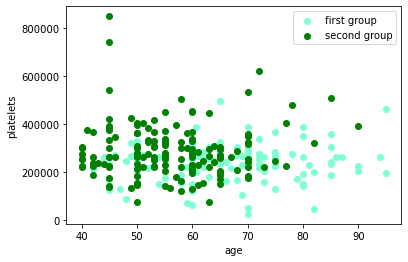

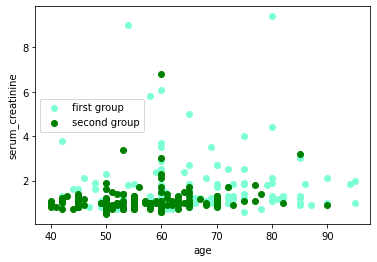

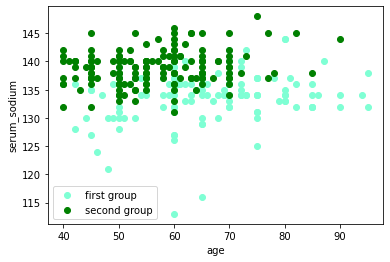

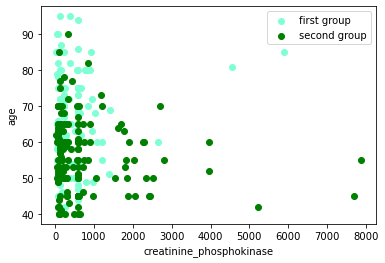

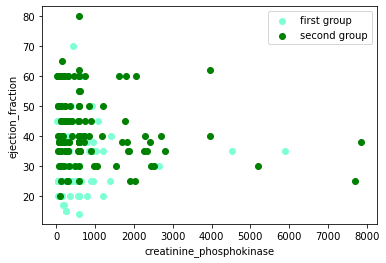

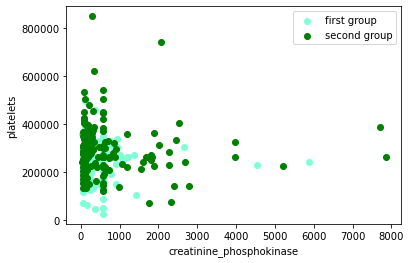

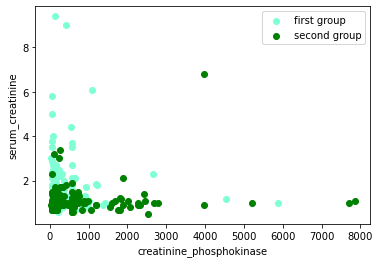

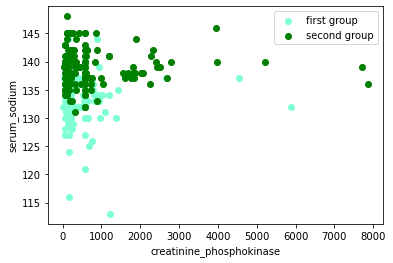

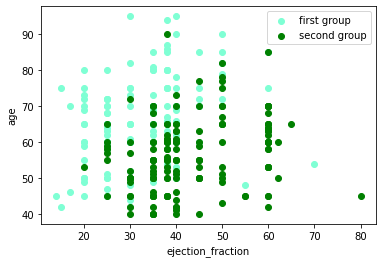

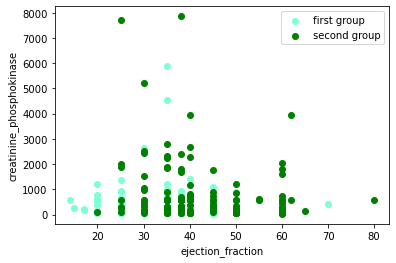

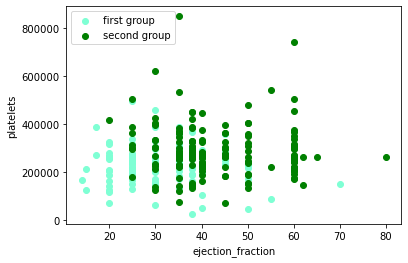

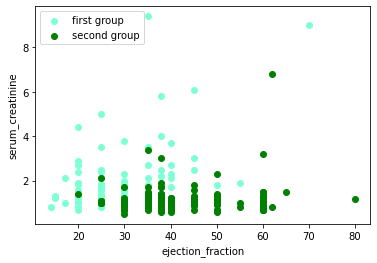

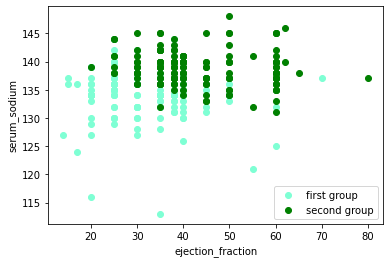

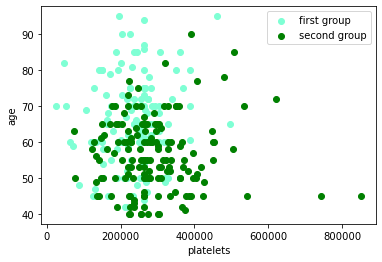

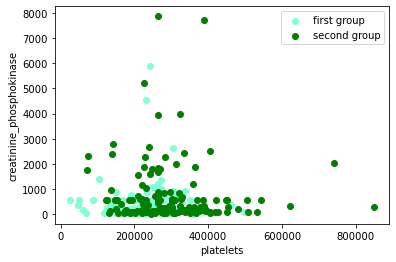

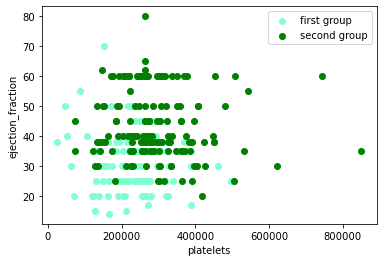

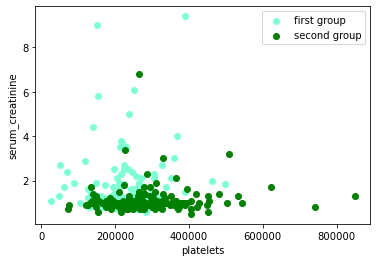

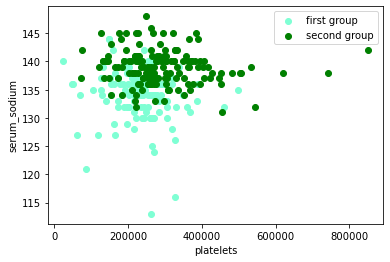

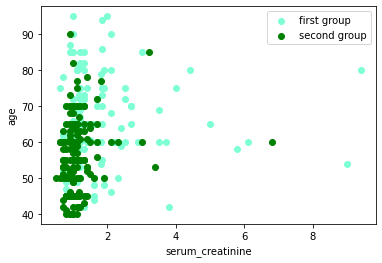

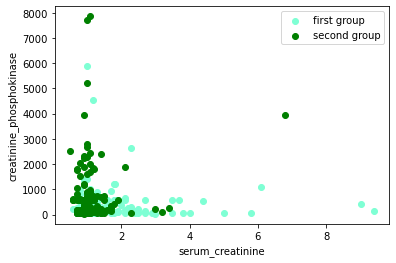

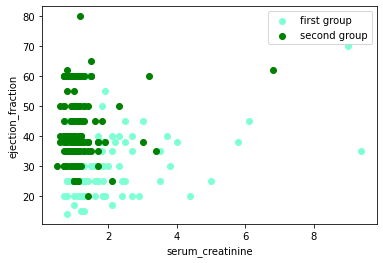

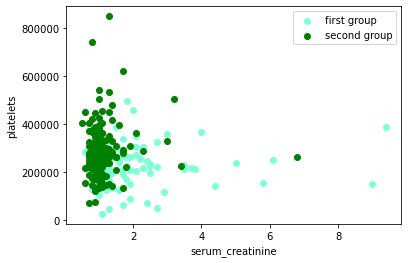

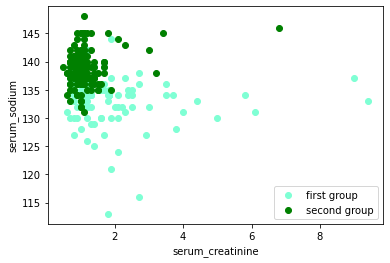

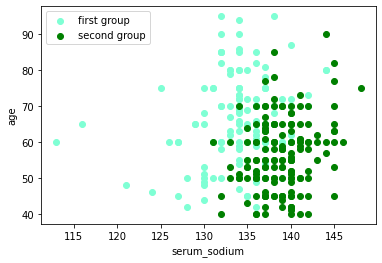

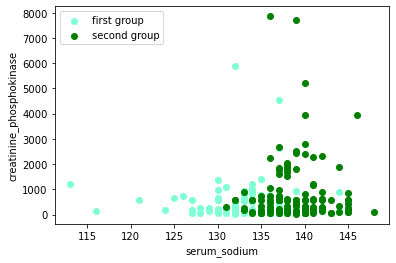

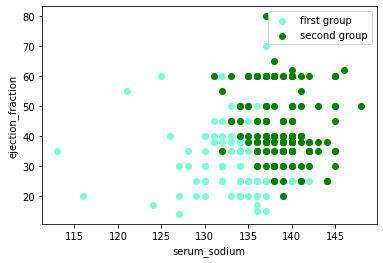

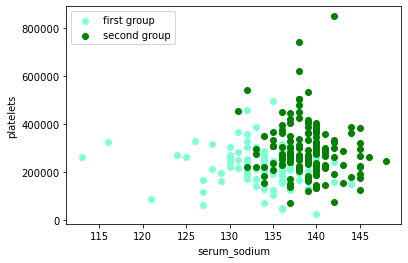

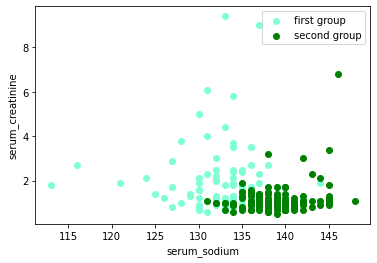

In [83]:
# best splits are the ones with serum_sodium and serum_creatinine
for i in range(len(cols)):
    for j in range(len(cols)):
        if i != j:
            plt.scatter(filtered_label0[cols[i]], filtered_label0[cols[j]],color ='aquamarine', label='first group')
            plt.scatter(filtered_label1[cols[i]], filtered_label1[cols[j]],color ='green', label='second group')
            plt.xlabel(cols[i])
            plt.ylabel(cols[j])
            plt.legend()
            plt.show()

[Text(0.5, 1.0, 'group 1')]

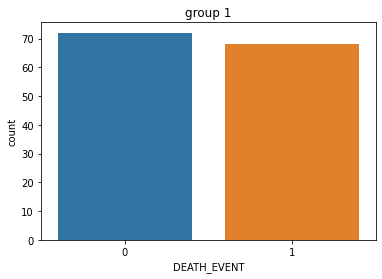

In [84]:
sns.countplot(x = filtered_label0['DEATH_EVENT']).set(title='group 1')
# this group has low sodium therefore more death
# also high creatinine die more. 
# both of these findings are in line with the medicial consensus. 

[Text(0.5, 1.0, 'group 2')]

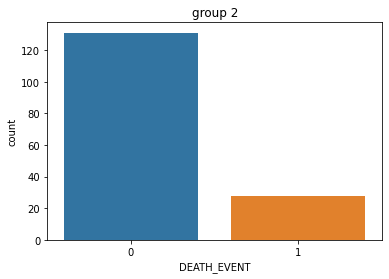

In [85]:
sns.countplot(x = filtered_label1['DEATH_EVENT']).set(title='group 2') # second group has less deaths

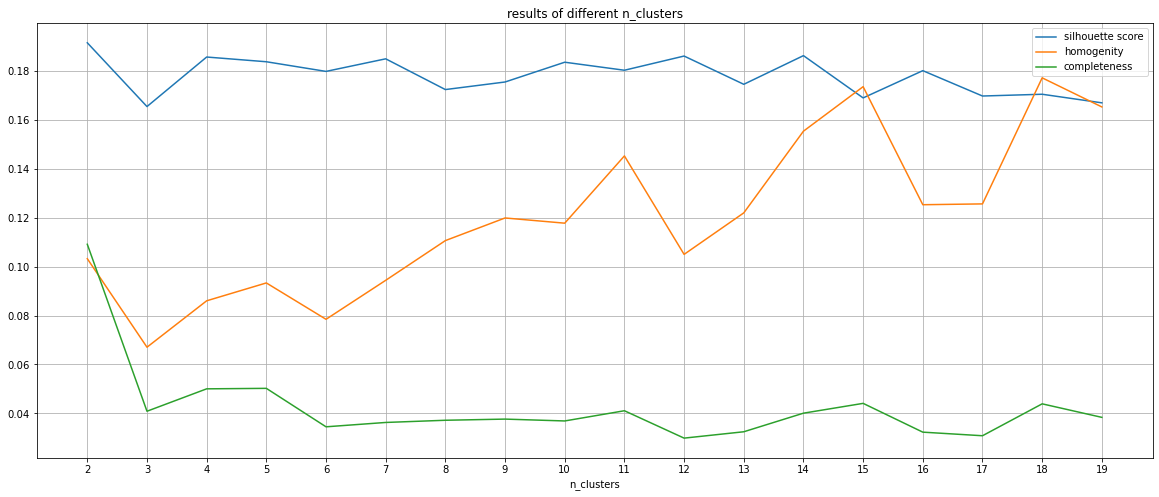

In [86]:
sihl_arr = []
hom_arr = []
com_arr = []
n_a = []
for j in range(2,20):
    kmeans = KMeans(n_clusters=j)
    label = kmeans.fit_predict(col_set)
    silhouette = silhouette_score(col_set, label)
    homogenity = homogeneity_score(np.array(data['DEATH_EVENT']),label)
    completeness = completeness_score(np.array(data['DEATH_EVENT']),label)
    sihl_arr.append(silhouette)
    hom_arr.append(homogenity)
    com_arr.append(completeness)
    n_a.append(j)
    

plt.figure(figsize=(20, 8))
plt.title('results of different n_clusters')
plt.plot(n_a,sihl_arr, label='silhouette score')
plt.plot(n_a,hom_arr, label='homogenity')
plt.plot(n_a,com_arr, label='completeness')
plt.legend()
plt.grid()
plt.xlabel('n_clusters')
plt.xticks(n_a)
plt.show()    

## Supervised Learning 

### Data preparation

In [87]:
X = data.copy()
X['sex'] = X['sex'].replace({'f':0, 'm': 1})
X = X.drop(columns=['time','DEATH_EVENT'])
y = data['DEATH_EVENT']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()

catg = ['anaemia','high_blood_pressure','diabetes','smoking']

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test_copy = X_test.copy()
X_test[cols] = scaler.transform(X_test[cols])

### Logistic regression 

In [89]:
#logistic regresssion 
lr = LogisticRegression(random_state=16,class_weight = 'balanced') 
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [90]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[34, 10],
       [11, 20]])

In [91]:
target_names = ['alive', 'dead'] 
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

       alive       0.76      0.77      0.76        44
        dead       0.67      0.65      0.66        31

    accuracy                           0.72        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.72      0.72      0.72        75



###  Decision tree

In [92]:
clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=2,random_state=0)
# scaler = StandardScaler()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [93]:
target_names = ['alive', 'dead']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

       alive       0.70      0.86      0.78        44
        dead       0.71      0.48      0.58        31

    accuracy                           0.71        75
   macro avg       0.71      0.67      0.68        75
weighted avg       0.71      0.71      0.69        75



39
39


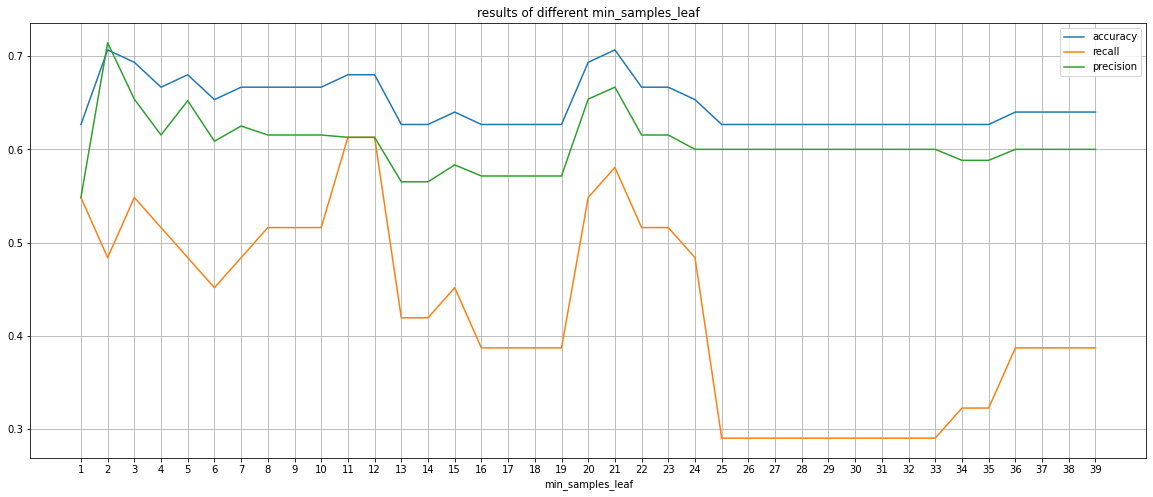

In [94]:

# on test data
# lr = LogisticRegression(random_state=1,class_weight='balanced',solver='liblinear') # more iterations yield better results, overfitting? 
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
functions = ['gini','entropy','log_loss']
accs = []
recs = []
pres =[]
arr_n = []
y_pred_arr = []
for i in range(1,40):
    clf = tree.DecisionTreeClassifier(criterion='gini',min_samples_leaf=i,random_state=0) # 2 is the best value but we could test that
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    arr_n.append(i)
    accs.append(accuracy_score(y_test,y_pred))
    recs.append(recall_score(y_test,y_pred))
    pres.append(precision_score(y_test,y_pred))

for i in functions:
    clf = tree.DecisionTreeClassifier(criterion=i,min_samples_leaf=2,random_state=0) # 2 is the best value but we could test that
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_arr.append(y_pred)
    
    
    
print(len(accs))
print(len(arr_n))
plt.figure(figsize=(20, 8))
plt.plot(arr_n,accs, label='accuracy')
plt.plot(arr_n,recs, label='recall')
plt.plot(arr_n,pres, label='precision')
plt.title('results of different min_samples_leaf')
plt.legend()
plt.grid()
plt.xlabel('min_samples_leaf')
plt.xticks(arr_n)
plt.show()

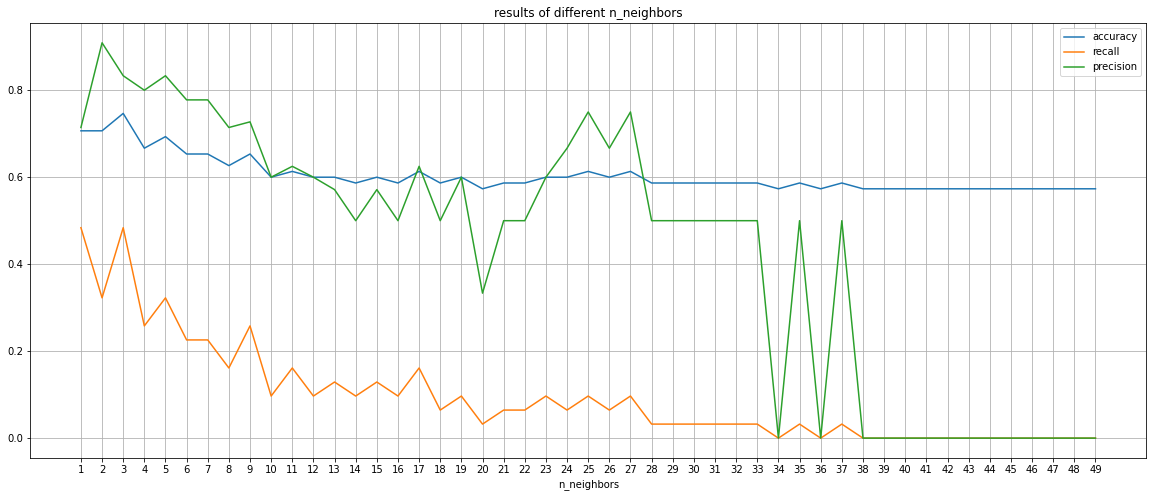

In [95]:
# uncomment and run to see the metrics plot
acc_R = []
rec_R = []
pre_R = []
n_R = []
for i in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors=i, p =1)  #originally 3. An increase leads to slightly better results
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    acc_R.append(accuracy_score(y_test,y_pred))
    rec_R.append(recall_score(y_test,y_pred))
    pre_R.append(precision_score(y_test,y_pred))
    n_R.append(i)
plt.figure(figsize=(20, 8))
plt.title('results of different n_neighbors')
plt.plot(n_R,acc_R,label='accuracy')
plt.plot(n_R,rec_R,label='recall')
plt.plot(n_R,pre_R,label='precision')
plt.xlabel('n_neighbors')
plt.xticks(n_R)
plt.grid()
plt.legend()

In [96]:
# test data
cnf_matrices =[]
for i in range(len(y_pred_arr)):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred_arr[i])
    cnf_matrices.append(cnf_matrix)
    print(functions[i],":",cnf_matrix)


gini : [[38  6]
 [16 15]]
entropy : [[33 11]
 [17 14]]
log_loss : [[33 11]
 [17 14]]


In [97]:
target_names = ['alive', 'dead']
# test data
for i in range(len(y_pred_arr)):
    print('accuracy {c}: {s}'.format(c=functions[i],s=accuracy_score(y_test,y_pred_arr[i])))

accuracy gini: 0.7066666666666667
accuracy entropy: 0.6266666666666667
accuracy log_loss: 0.6266666666666667


### KNN 

In [98]:
neigh = KNeighborsClassifier(n_neighbors=3, p =1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

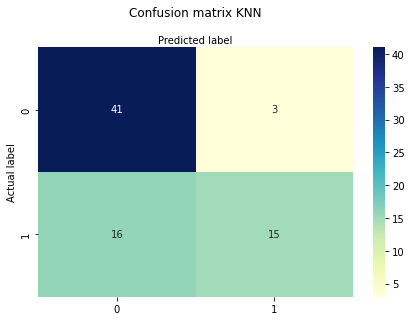

In [99]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
class_names=['0','1']
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # annot prints the vals on the blocks
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)

In [100]:
target_names = ['alive', 'dead']
print(classification_report(y_test, y_pred,target_names=target_names))

              precision    recall  f1-score   support

       alive       0.72      0.93      0.81        44
        dead       0.83      0.48      0.61        31

    accuracy                           0.75        75
   macro avg       0.78      0.71      0.71        75
weighted avg       0.77      0.75      0.73        75



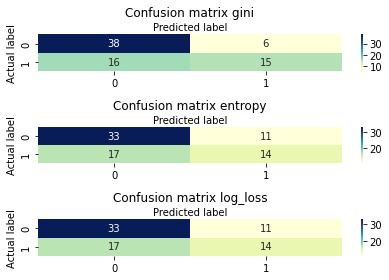

In [101]:
class_names=['0','1']
fig, ax = plt.subplots(3)
for i in range(len(cnf_matrices)):
    sns.heatmap(pd.DataFrame(cnf_matrices[i]), annot=True, cmap="YlGnBu" ,fmt='g',ax=ax[i]) # annot prints the vals on the blocks
    ax[i].xaxis.set_label_position("top")
    plt.tight_layout()
    ax[i].set_title('Confusion matrix {name}'.format(name=functions[i],y =0.5))
    for a in ax.flat:
        a.set(xlabel='Predicted label', ylabel='Actual label')
        ax[i].set_xticklabels(class_names)
        ax[i].set_yticklabels(class_names)